In [1]:
using Printf

function sum_elements(array)
    return_tmp = 0
    for i= 1:length(array)
        return_tmp+=array[i]
    end
    return return_tmp
end

function recursive_sum_elements(myArray, acc, stop, i)
    if i==stop
        return acc
    else
        tmp=pop!(myArray)
        acc+=tmp
        i++
        return recursive_sum_elements(myArray, acc, stop, i)
    end
end

function recursive_sum_elements2(myArray, myStart, myEnd)
    if myStart >= myEnd
        return myArray[myStart]
    else
        middle = Int64(floor(((myStart + myEnd)/2)))
        return recursive_sum_elements2(myArray, myStart, middle) + recursive_sum_elements2(myArray, middle+1, myEnd)
    end
end
    
function simple_multiplication(a,b)
    return a*b
end

function absolute(a,b)
    return abs(a-b)
end

function relative(a,b)
    return absolute(a,b)/ b
end

function sumSubArray(arrAbs, arrRel, arrLen, array, myStep)
    mySum = 0
    myValue = array[1]
    range = Int64(length(array)/ myStep)
    #@printf "%d" range
    for i= 1:range
        for j= 1:myStep
            mySum += array[myStep*(i-1) + j]
            #@printf "Dodalem"
        end
        realVal = myValue * i * myStep
        tmpAbs = absolute(mySum, realVal)
        push!(arrAbs, tmpAbs)
        tmpRel = relative(mySum, realVal)
        push!(arrRel, tmpRel)
        push!(arrLen, Int64(range*i))
    end
end

function recSumSubArray(arrAbs, arrRel, arrLen, array, myStep)
    mySum = 0
    myValue = array[1] 
    range = Int64(length(array)/ myStep)
    for i=1:range
        tmpSum=recursive_sum_elements2(array, (i-1)*myStep+1, i*myStep)
        realVal = myValue * myStep
        tmpAbs = absolute(tmpSum, realVal)
        push!(arrAbs, tmpAbs)
        tmpRel = relative(tmpSum,realVal)
        push!(arrRel, tmpRel)
        push!(arrLen, Int64(range*i))
    end
end

recSumSubArray (generic function with 1 method)

In [2]:
my_range = 10000000
my_variable=Float32(pop!(rand(1)))
array = Float32[]
arrayCopy = Float32[]
for i=1:my_range
    push!(array, my_variable)
    push!(arrayCopy, my_variable)
end
my_variable

0.7797661f0

In [3]:
mySum = sum_elements(array)

8.629762f6

In [4]:
bitstring(mySum)

"01001011000000111010111000000010"

In [5]:
myMult = simple_multiplication(my_range, my_variable)

7.797661f6

In [6]:
bitstring(myMult)

"01001010111011011111011100111010"

In [7]:
myAbsError = absolute(mySum, myMult)

832101.0f0

In [8]:
myRelError = relative(mySum, myMult)

0.10671162f0

In [9]:
arrAbsErr = Float32[]
arrRelErr = Float32[]
arrLenght = Int64[]
myStep = 1000
sumSubArray(arrAbsErr, arrRelErr, arrLenght, array, myStep)
arrAbsErr

10000-element Array{Float32,1}:
      0.0037231445
      0.022705078 
      0.041748047 
      0.060791016 
      0.080078125 
      0.09863281  
      0.11767578  
      0.13671875  
      0.15625     
      0.17529297  
      0.046875    
      0.51660156  
      0.98535156  
      ⋮           
 829678.5         
 829898.5         
 830119.0         
 830339.0         
 830559.5         
 830779.5         
 831000.0         
 831220.0         
 831440.5         
 831661.0         
 831881.0         
 832101.5         

In [10]:
arrRelErr

10000-element Array{Float32,1}:
 4.774694e-6 
 1.4558903e-5
 1.7846398e-5
 1.9490144e-5
 2.0539013e-5
 2.1081709e-5
 2.1558806e-5
 2.1916629e-5
 2.2264512e-5
 2.24802e-5  
 5.464926e-6 
 5.5209028e-5
 9.720386e-5 
 ⋮           
 0.10651812  
 0.106535695 
 0.10655334  
 0.10657091  
 0.10658854  
 0.1066061   
 0.10662373  
 0.106641285 
 0.10665891  
 0.10667653  
 0.10669407  
 0.106711686 

In [11]:
arrLenght

10000-element Array{Int64,1}:
     10000
     20000
     30000
     40000
     50000
     60000
     70000
     80000
     90000
    100000
    110000
    120000
    130000
         ⋮
  99890000
  99900000
  99910000
  99920000
  99930000
  99940000
  99950000
  99960000
  99970000
  99980000
  99990000
 100000000

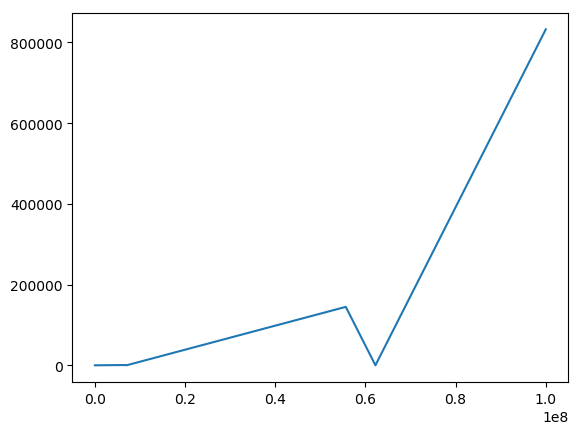

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000256DD358>

In [12]:
using PyPlot
PyPlot.plot(arrLenght, arrAbsErr)

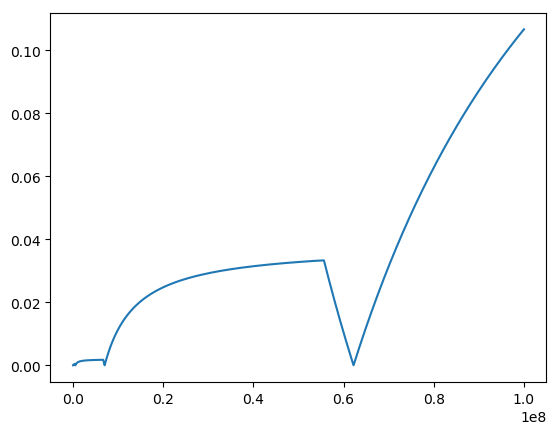

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002DAB6940>

In [13]:
PyPlot.plot(arrLenght, arrRelErr)

In [14]:
recSum = recursive_sum_elements2(array, 1, 10000000)

7.797661f6

In [15]:
myMult

7.797661f6

In [16]:
recAbsErr = absolute(recSum, myMult)

0.0f0

In [17]:
recRelErr = relative(recSum, myMult)

0.0f0

In [18]:
recArrAbsErr = Float32[]
recArrRelErr = Float32[]
recArrLenght = Int64[]
recArrTmp = Float32[]
myStep = 1000
recSumSubArray(recArrAbsErr, recArrRelErr, recArrLenght, array, myStep)
recArrAbsErr

10000-element Array{Float32,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [19]:
recArrRelErr

10000-element Array{Float32,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

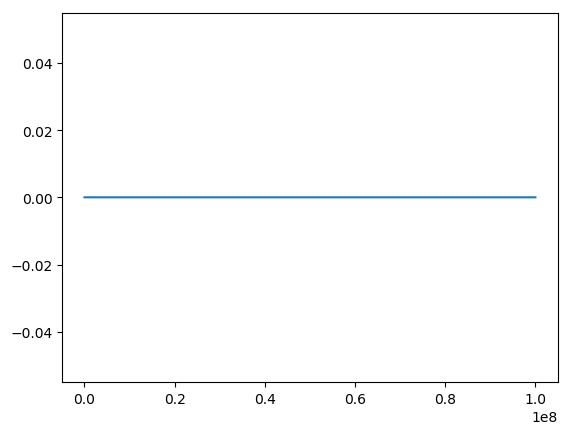

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002FF1ACF8>

In [20]:
PyPlot.plot(recArrLenght, recArrAbsErr)

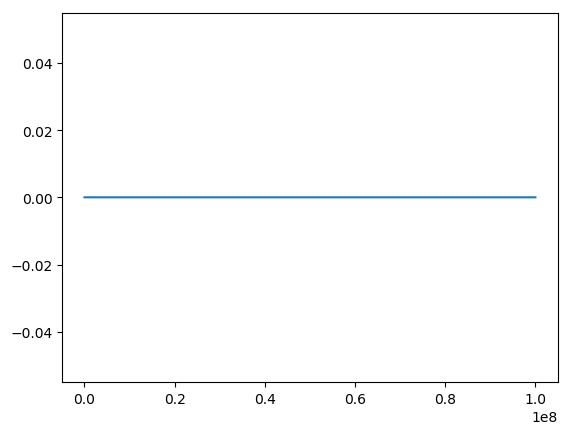

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002FF74780>

In [21]:
PyPlot.plot(recArrLenght, recArrRelErr)